## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
import psutil
print(psutil.cpu_percent(interval = 10, percpu = True))
print(psutil.virtual_memory())

[6.3, 6.1, 5.5, 0.0, 7.2, 0.0, 0.0, 5.9]
svmem(total=4263886848, available=2096635904, percent=50.8, used=2167250944, free=2096635904)


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\envirment_1\lib\site-packages\tensorflow\python

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
from sklearn import preprocessing
import numpy as np
x_data = np.vstack((train[0],test[0]))
#x_data = x_data.reshape((len(x_data), -1))
min_matrix=np.zeros(x_data.shape[1:])
max_matrix=np.zeros(x_data.shape[1:])

for i in range(x_data.shape[1]):
    for j in range(x_data.shape[2]):
        for k in range(x_data.shape[3]):
            
            min_matrix[i,j,k]=np.min(x_data[:,i,j,k])
            max_matrix[i,j,k]=np.max(x_data[:,i,j,k])
            

#minmaxscaler = preprocessing.MinMaxScaler()
#minmaxscaler.fit(x_data)

def preproc_x(x , flatten =True):
    #x = x.reshape((len(x), -1))
    #x = minmaxscaler.transform(x)
    x = (x - min_matrix)/(max_matrix-min_matrix)
    x = 2*(x - 0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x
 

def preproc_y(y , num_class=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y , num_class)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
model

In [6]:
"""Code Here
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    model = Sequential()
    model.add(Dense(input_shape= input_shape , units = 512 , activation = 'relu'))
    model.add(Dense(units = 256 , activation = 'relu'))
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = 128 , activation = 'relu'))
    model.add(Dense(units = 64 , activation = 'relu'))
    model.add(Dense(units = 64 , activation = 'relu'))
    model.add(Dense(units = 32 , activation = 'relu'))
    model.add(Dense(units =10, activation = 'softmax'))
    return model
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 441us/step - loss: 1.7695 - accuracy: 0.3719 - val_loss: 1.5814 - val_accuracy: 0.4507
Epoch 2/100
50000/50000 [==============================] - 13s 257us/step - loss: 1.5080 - accuracy: 0.4685 - val_loss: 1.4876 - val_accuracy: 0.4721
Epoch 3/100
50000/50000 [==============================] - 13s 255us/step - loss: 1.3894 - accuracy: 0.5117 - val_loss: 1.4159 - val_accuracy: 0.5009
Epoch 4/100
50000/50000 [==============================] - 13s 259us/step - loss: 1.2949 - accuracy: 0.5441 - val_loss: 1.3767 - val_accuracy: 0.5155
Epoch 5/100
50000/50000 [==============================] - 13s 257us/step - loss: 1.2100 - accuracy: 0.5723 - val_loss: 1.3841 - val_accuracy: 0.5187
Epoch 6/100
50000/50000 [==============================] - 13s 252us/step - loss: 1.1337 - accuracy: 0.5989 - val_loss: 1.3883 - val_accuracy: 0.5210
Epoch 7/100
50000/50000 [========================

50000/50000 [==============================] - 13s 267us/step - loss: 0.1189 - accuracy: 0.9605 - val_loss: 3.3015 - val_accuracy: 0.5384
Epoch 54/100
50000/50000 [==============================] - 13s 268us/step - loss: 0.1099 - accuracy: 0.9622 - val_loss: 3.4936 - val_accuracy: 0.5260
Epoch 55/100
50000/50000 [==============================] - 13s 269us/step - loss: 0.1193 - accuracy: 0.9604 - val_loss: 3.4495 - val_accuracy: 0.5336
Epoch 56/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.1069 - accuracy: 0.9643 - val_loss: 3.5007 - val_accuracy: 0.5332
Epoch 57/100
50000/50000 [==============================] - 12s 250us/step - loss: 0.1079 - accuracy: 0.9644 - val_loss: 3.5177 - val_accuracy: 0.5295
Epoch 58/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.1125 - accuracy: 0.9636 - val_loss: 3.4723 - val_accuracy: 0.5305
Epoch 59/100
50000/50000 [==============================] - 14s 272us/step - loss: 0.0912 - accuracy: 0.970

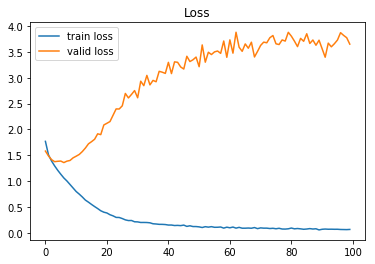

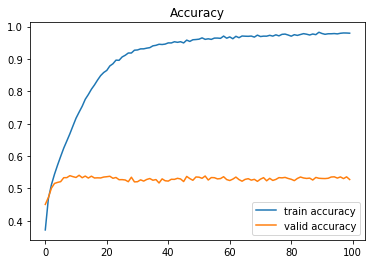

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()